In [34]:
from pearce.mocks.kittens import cat_dict
import numpy as np

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [36]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [37]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [38]:
cat.load(0.658, HOD='abRedMagic')

0.658


In [39]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo']

In [40]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

In [41]:
print float(sum(mass_cut))/len(mass_cut)

3.10153519216e-05


In [42]:
print cat.pmass

591421440.0


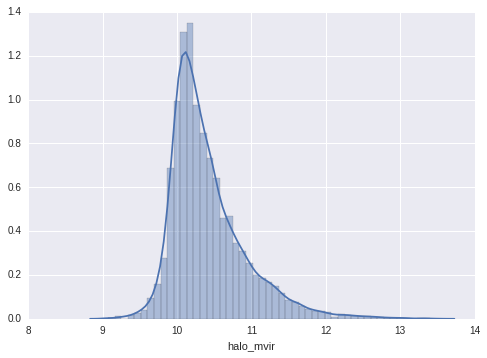

In [43]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

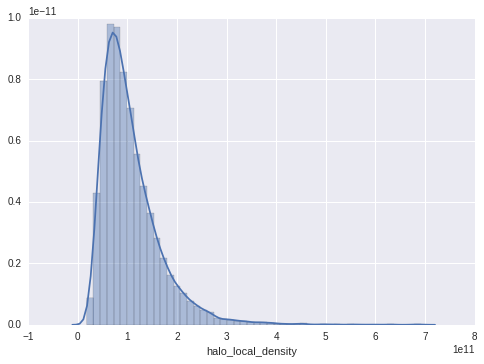

In [44]:
sns.distplot(cat.halocat.halo_table['halo_local_density'][rand_idxs], hist=True, kde=True)

In [45]:
print min(cat.halocat.halo_table['halo_local_density'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density'][rand_idxs])

18157222841.4
691103999719.0


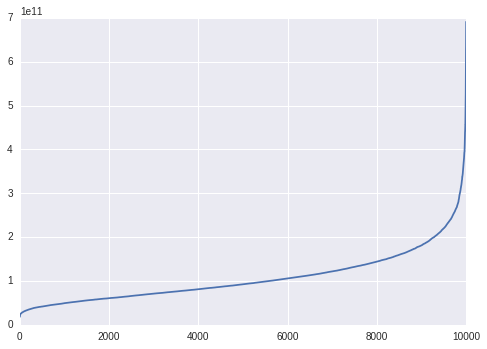

In [46]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]))

In [47]:
vol = 4*np.pi/3*(5**3)

In [48]:
print sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]*vol/(100*cat.pmass))[:50]

[160.75, 164.5, 169.99999999999994, 179.49999999999994, 189.87499999999994, 189.87499999999994, 196.99999999999997, 201.62499999999997, 206.37499999999997, 207.99999999999997, 208.49999999999997, 211.49999999999997, 212.24999999999997, 212.74999999999997, 213.49999999999997, 215.24999999999997, 216.12499999999997, 217.74999999999997, 220.49999999999994, 221.37499999999997, 222.74999999999997, 223.62499999999997, 225.99999999999997, 226.99999999999997, 227.62499999999997, 228.37499999999997, 229.49999999999997, 231.24999999999997, 231.49999999999997, 231.62499999999997, 231.74999999999997, 232.87499999999997, 233.87499999999997, 234.87499999999997, 235.12499999999997, 235.87499999999997, 236.99999999999997, 237.12499999999997, 238.24999999999997, 239.37499999999997, 239.49999999999997, 240.62499999999997, 240.74999999999997, 242.37499999999997, 243.24999999999997, 243.37499999999997, 244.49999999999997, 245.24999999999997, 246.37499999999997, 247.62499999999997]


In [49]:
rho_b = cat.halocat.halo_table['halo_local_density']

In [50]:
rho_halo = cat.halocat.halo_table['halo_mvir']/(4*np.pi/3*cat.halocat.halo_table['halo_rvir']**3)

In [51]:
relative_density = rho_halo/rho_b

(array([  3.15250000e+04,   1.06771000e+05,   2.33046000e+05,
          4.70000000e+05,   7.28235000e+05,   9.23558000e+05,
          1.03382700e+06,   1.14237800e+06,   1.19452000e+06,
          1.18377600e+06,   1.16047700e+06,   1.10194300e+06,
          1.04430300e+06,   9.76434000e+05,   8.95066000e+05,
          8.16454000e+05,   7.42890000e+05,   6.70091000e+05,
          6.02953000e+05,   5.40481000e+05,   4.73510000e+05,
          4.21399000e+05,   3.66759000e+05,   3.17229000e+05,
          2.77232000e+05,   2.41347000e+05,   2.09808000e+05,
          1.82438000e+05,   1.57519000e+05,   1.34581000e+05,
          1.16051000e+05,   9.95030000e+04,   8.51840000e+04,
          7.26500000e+04,   6.25760000e+04,   5.41080000e+04,
          4.65150000e+04,   4.01320000e+04,   3.41470000e+04,
          2.89950000e+04,   2.44690000e+04,   2.06310000e+04,
          1.76710000e+04,   1.49020000e+04,   1.24950000e+04,
          1.10470000e+04,   9.54000000e+03,   8.04400000e+03,
        

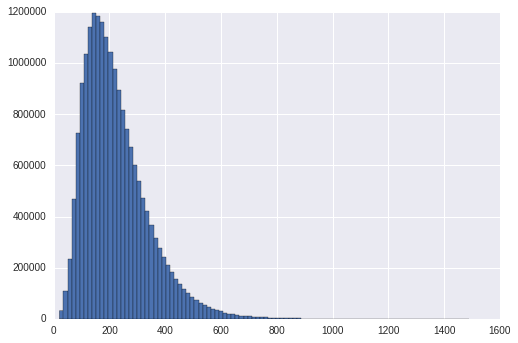

In [52]:
plt.hist(relative_density, bins=100)

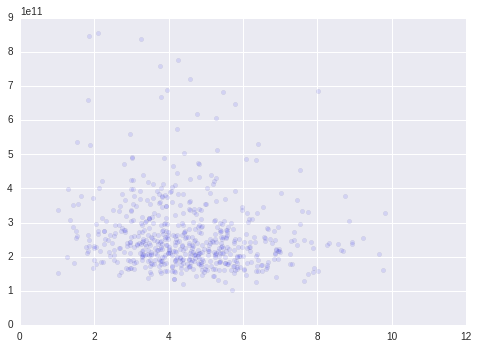

In [53]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], alpha=0.1)

In [54]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e5), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e13

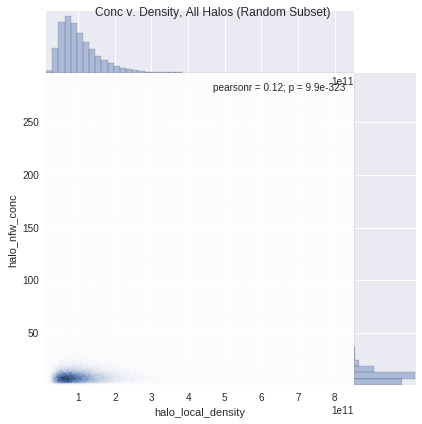

In [55]:
sns.jointplot(cat.halocat.halo_table['halo_local_density'][rand_idxs],\
         cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, All Halos (Random Subset)')

In [56]:
n_particles = cat.halocat.halo_table['halo_local_density']*(4*np.pi/300*10**3)/(cat.pmass)
rho_bar = 2048**3/(400.0**3)*(4*np.pi/300*10**3)
cat.halocat.halo_table['halo_rorb']= n_particles/rho_bar

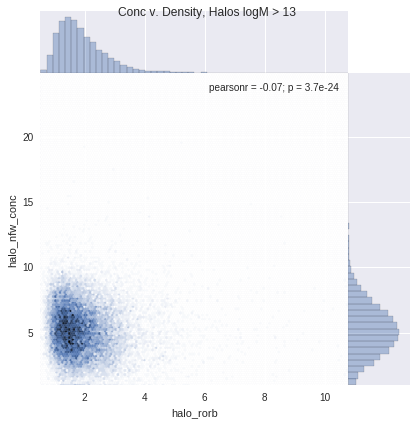

In [57]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 13')

In [58]:
idxs = np.logical_and(cat.halocat.halo_table['halo_rorb'][mass_cut] < 15, cat.halocat.halo_table['halo_nfw_conc'][mass_cut]<13)

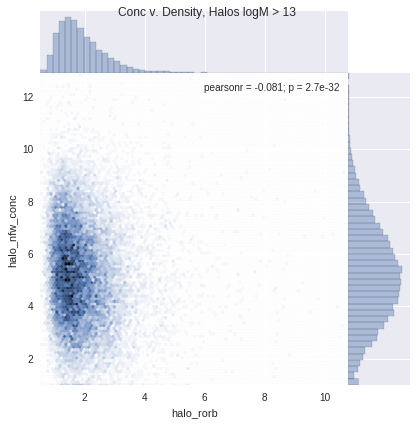

In [59]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut][idxs],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut][idxs],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 13')

In [60]:
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

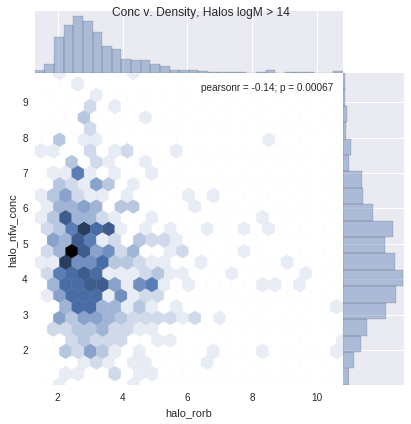

In [61]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 14')

In [62]:
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e13

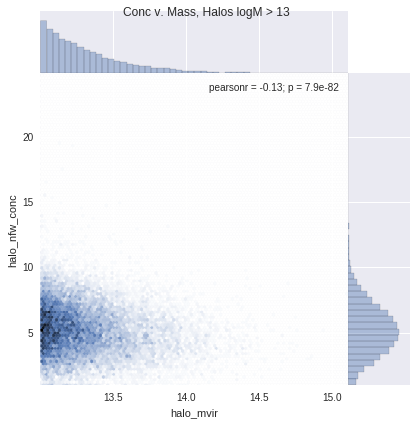

In [63]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]),\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Mass, Halos logM > 13')

In [64]:
idxs = np.logical_and(cat.halocat.halo_table['halo_rorb'][mass_cut] < 15, cat.halocat.halo_table['halo_mvir'][mass_cut]<10**14.25)

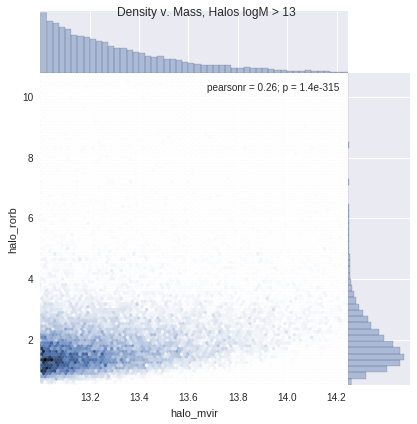

In [65]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut][idxs]),\
         cat.halocat.halo_table['halo_rorb'][mass_cut][idxs],kind = 'hex', space=0)
plt.suptitle('Density v. Mass, Halos logM > 13')

In [66]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], alpha=0.1)

NameError: name 'other_density' is not defined

In [ ]:
sns.jointplot(cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3),\
         cat.halocat.halo_table['halo_local_density'][mass_cut]/100, kind = 'hex', space=0)

In [ ]:
ratio = (cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3))/cat.halocat.halo_table['halo_local_density'][mass_cut]

In [ ]:
ratio.mean(), ratio.std()

In [ ]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], kind = 'hex', space=0)

In [ ]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

In [ ]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [ ]:
cat.model.param_dict

In [ ]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [ ]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

In [ ]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 0.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0.0

In [ ]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [ ]:
cat.model.param_dict

In [ ]:
cat.calc_number_density()

In [ ]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [ ]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [ ]:
wp_vals.shape

In [ ]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

In [ ]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [ ]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

In [ ]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [ ]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [ ]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [ ]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()